Epoch 1/150
24/24 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.5067 - val_loss: 0.6804 - val_accuracy: 0.6507
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6354 - val_loss: 0.6693 - val_accuracy: 0.7945
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.7113 - val_loss: 0.6601 - val_accuracy: 0.7877
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.7258 - val_loss: 0.6524 - val_accuracy: 0.8082
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.7506 - val_loss: 0.6456 - val_accuracy: 0.8356
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7398 - val_loss: 0.6385 - val_accuracy: 0.8219
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7519 - val_loss: 0.6323 - val_accuracy: 0.8356
Epoch 8/150
2

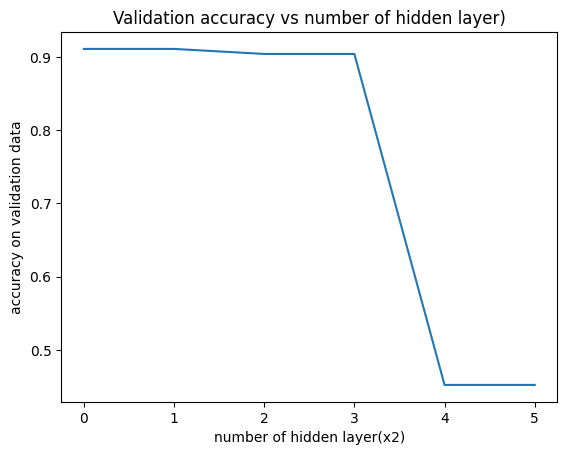

In [23]:
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

df = pd.read_csv("housepricedata.csv")
# df.head(7)
dataset = df.values
X = dataset[:,:10]
Y = dataset[:,10]
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size= 0.5)
class neural_network:
    def __init__(self,X_va, X_tra,Y_va,Y_tra,lay,uni,act,bat_siz,epo,learn_rate,l):
        self.network = Sequential()
        self.network.add(Dense(units=uni, activation=act, input_dim = 10,activity_regularizer=regularizers.l1(l) ))
        for i in range(lay):
            self.network.add(Dense(units=uni, activation=act,kernel_initializer = 'glorot_uniform',activity_regularizer=regularizers.l1(l)))
            self.network.add(Dropout(0.34))
        self.network.add(Dense(units=1, activation='sigmoid',activity_regularizer=regularizers.l1(l)))
        SD = tf.keras.optimizers.SGD(learning_rate=learn_rate,momentum=0.5, lr = 0.009)
        es = EarlyStopping(
            monitor= 'val_loss',
            patience = 7,
            verbose = 1,
            mode = 'min'
        )
        self.network.compile(optimizer=SD, loss='binary_crossentropy', metrics=['accuracy'])
        self.histo = self.network.fit(X_tra, Y_tra,callbacks = [es],verbose = 1, batch_size=bat_siz, epochs=epo,validation_data =(X_va, Y_va))
ak = []
for j in range(6):
    networ = neural_network(X_val,X_train,Y_val,Y_train,2*j,30,'relu',50,150,0.02,2*10**-4)
    k2 = networ.network.evaluate(X_val,Y_val)[1]
    ak.append(k2)
plt.plot(ak)
plt.title("Validation accuracy vs number of hidden layer)")
plt.xlabel("number of hidden layer(x2)")
plt.ylabel("accuracy on validation data")
plt.show()
# print("sdhsbdjkan")
# print()
# prediction = networ.network.predict(X_test)
# prediction = [1 if y>=0.87 else 0 for y in prediction]
# # prediction
# plt.plot(networ.histo.history['loss'])
# plt.plot(networ.histo.history['val_loss'])
# plt.title("Loss vs Epoch")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend(["Train","val"], loc = "upper right")
# plt.show()